# Logistic Regression
## Approximation
Recall that for linear regression, the function has the form:
* $f(w,b) = wx + b$ - this will output continuous values of a linear function

In logistic regression, we want a **probability distribution** instead of continuous values, which is why we apply a **sigmoid function** to our linear function to model the probability:

* $\hat{y} = h_{\theta}(x) = \frac{1}{1+e^{-wx+b}}$ - this will output a collection of probabilities

## Sigmoid function
Recall that the sigmoid function is:

$ s(x) = \frac{1}{1+e^{-x}}$

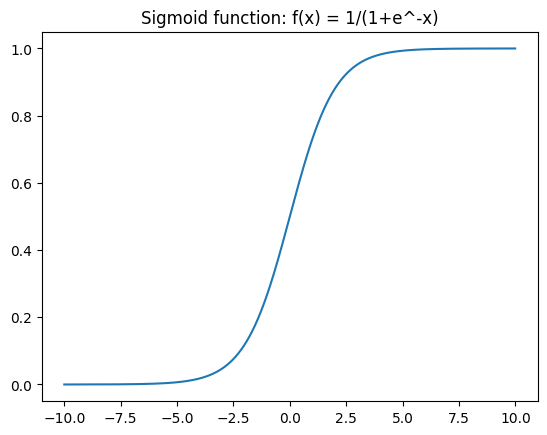

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
  e = np.exp(1)
  return 1/(1 + e**(-x))


values = np.arange(-10,10, 0.01)

outputs = [sigmoid(x) for x in values]

# print(values, outputs)


plt.figure()
plt.plot(values, outputs)
plt.title('Sigmoid function: f(x) = 1/(1+e^-x)')
plt.show()

# Probability Distribution
The sigmoid function outputs a probability between 0 and 1 for an individual input. Note that the range of the sigmoid function is between 0 and 1.
With this function, we can model a probability of our data, and with the approximated output, we must come up with the parameters $w,b$, which is done via **gradient descent** and a **cost function**, known as the **categorical cross entropy function**

# Cost Function: **Categorical Cross Entropy**

$J(w,b) = J(\theta) = \frac{1}{n} \sum_{i=1}^{n} \left(y^i log(h_{\theta}(x^i)) +(1-y^i)log(1-h_{\theta}(x^i)) \right) $

We optimize the cost function w.r.t our model parameters $\theta_i$ using gradient descent:

$\theta_i = \theta_{i-1} - \alpha \frac{\partial J}{\partial \theta}$

or in our case:

$w = w - \alpha \cdot dw$

$b = b - \alpha \cdot db$

that is

$J'(\theta) = \begin{pmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db} \end{pmatrix} = $
$ = \begin{pmatrix} \frac{1}{n} \sum_{i=1}^{n} 2x_i(\hat{y} - y_i) \\  \frac{1}{n} \sum_{i=1}^{n} 2(\hat{y} - y_i) \end{pmatrix} $

Note that these are the same as in linear regression.

In [11]:
import numpy as np


class LogisticRegression:
  def __init__(self, lr: float=0.01, n_iters: int = 100):
    self.lr = lr
    self.n_iters = n_iters
    # creating weight attributes:
    self.weights = None
    self.bias = None

  # following sklearn conventions:

  # takes training samples and their labels:
  # X is an mxn matrix of m samples of n features
  # y is a mx1 vector of labels corresponding to each training sample
  def fit(self, X, y):
    # training step and gradient descent

    # initialize parameters:
    n_samples, n_features = X.shape

    # now that we have the required shape, we init the parameters at 0:
    self.weights = np.zeros(n_features)
    self.bias = 0

    # gradient descent

    for _ in range(self.n_iters):
      # approximate our data with a linear model
      linear_model = np.dot(X,self.weights) + self.bias
      # apply the sigmoid function to get a probability
      y_pred = self._sigmoid(linear_model)

      # derivatives
      dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
      db = (2/n_samples) * np.sum(y_pred - y)

      # update
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    # predict on new test samples:
    # AGAIN:
    # approximate our data with a linear model
    linear_model = np.dot(X,self.weights) + self.bias
    # apply the sigmoid function to get a probability
    y_pred = self._sigmoid(linear_model)

    # if y_pred >= 0.5, then y_pred = class 1, otherwise 0
    y_pred_cls = [1 if i>= 0.5 else 0 for i in y_pred]

    return y_pred_cls



  # private helper sigmoid method:

  def _sigmoid(self, x):
    return 1/(1+np.exp(-x))


In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


bc = load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

regressor = LogisticRegression(lr = 0.00001, n_iters = 10000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Logistic Regression Classification Accuracy: {accuracy(y_test, y_pred)}')

Logistic Regression Classification Accuracy: 0.9210526315789473
